In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [5]:
# we are going to remove the UnNeccsary Column from our data set which is Unnamed: 0
df.drop('Unnamed: 0', axis = 1, inplace = True) 

In [6]:
# Now let's see what happend is it remove or not 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  18634 non-null  object
 1   Email Type  18650 non-null  object
dtypes: object(2)
memory usage: 291.5+ KB


In [7]:
# it is removed form our data set 
# Now you can see the we have some null value in our Email Text Column so we have to getrid out of it
df.isnull().sum()

Email Text    16
Email Type     0
dtype: int64

In [8]:
df.dropna(inplace = True )

In [9]:
df.duplicated().sum()

1096

In [10]:
# You can see the above we have some duplicated entries in our data set we have also remove these 
# rows from our data set 
df.drop_duplicates(inplace = True)

In [11]:
# Now our data set is clean let's see
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17538 entries, 0 to 18648
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  17538 non-null  object
 1   Email Type  17538 non-null  object
dtypes: object(2)
memory usage: 411.0+ KB


In [38]:
# let's see How much the phishing Emails are and How much SAfe Emails
df['Email Type'].value_counts()

Safe Email        10980
Phishing Email     6558
Name: Email Type, dtype: int64

# Visualization 

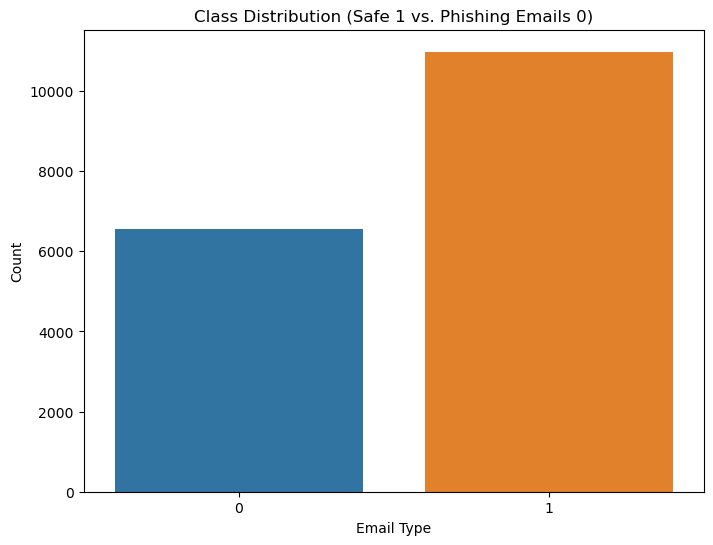

In [12]:

# Define features (x) and target (y)
x = df['Email Text']  # Replace 'Feature_Column' with the actual feature column name
y = df['Email Type'].replace({'Safe Email': 1, 'Phishing Email': 0})

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution (Safe 1 vs. Phishing Emails 0)')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()


In [13]:
# Now you see the above the blue chart is the Phishing Emails and Pumpkin color is Safe Emails 

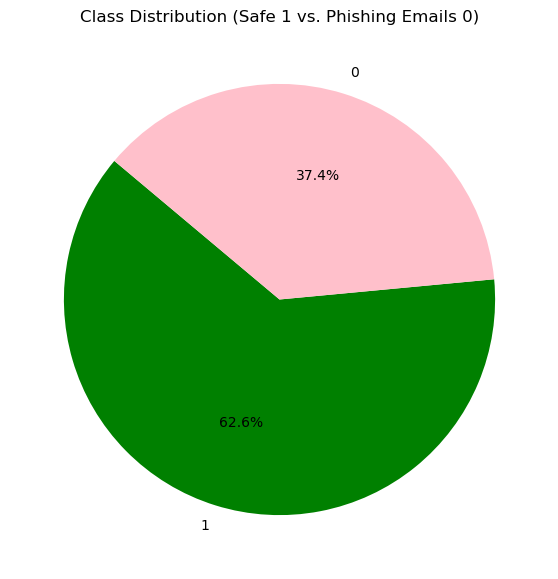

In [14]:
# Calculate class distribution
class_distribution = y.value_counts()

# Create a pie chart to visualize class distribution
plt.figure(figsize=(7, 7))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140, colors = ['green', 'pink'])
plt.title('Class Distribution (Safe 1 vs. Phishing Emails 0)')
plt.show()


# split the dataset and train the model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

In [16]:
# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [17]:
# Now checking the shape of the data 
x_train.shape, x_test.shape,y_train.shape, y_test.shape,x_val.shape

((10522,), (3508,), (10522,), (3508,), (3508,))

In [18]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(kernel='linear', probability=True, random_state=42))
])

In [19]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svm',
                 SVC(kernel='linear', probability=True, random_state=42))])

### Model Evaluation on validation set

In [20]:
# Make predictions on the validation set
y_val_pred = pipeline.predict(x_val)

In [21]:
# Now Accuracy on validation set 
print("Accuracy:", accuracy_score(y_val, y_val_pred))


Accuracy: 0.984036488027366


In [22]:
# Model Evaluation on Validation Set
print("Validation Set:")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Validation Set:
Confusion Matrix:
[[1298   24]
 [  32 2154]]


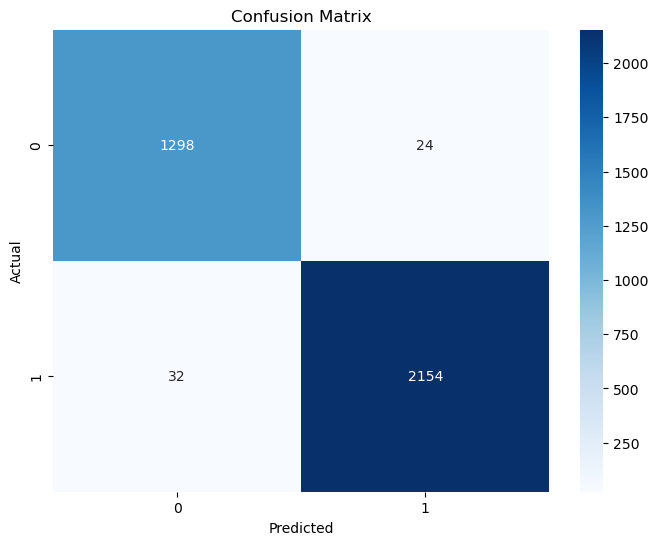

In [23]:
#Confusion Matrix Heatmap on validation set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Evaluation on test dataset

In [24]:
# Make predictions on the test set
y_test_pred = pipeline.predict(x_test)


In [25]:
# Now this is Accuracy on test set
print("Accuracy:", accuracy_score(y_test, y_test_pred))


Accuracy: 0.9809007981755986


In [26]:
print("Test set")
print("confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))

Test set
confusion Matrix
[[1251   37]
 [  30 2190]]


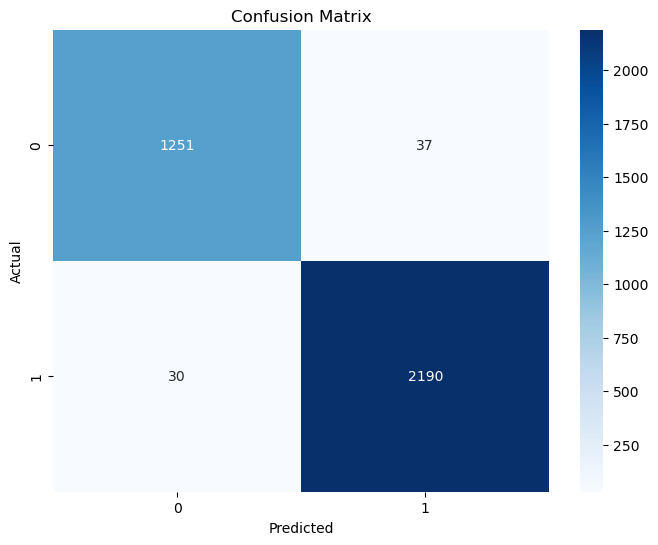

In [27]:
#Confusion Matrix Heatmap on test set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Prediction On Unseen Data 

In [30]:
test_text_1 = ['Hi team, just a quick update on the project.']
test_text_2 = ['chances to win CASH prize.']
test_text_3 = ['I am hosting a small get together tonight please you all come ']
test_text_4 = ['The Prizes are as big as cruises 3 nights in Las Vegas, and more.']
test_text_5 = ["15,re : testing ir & fx var nick and winston , i understand that ir & fx var numbers are calculated every day in risktrac . this results are overwritten everyday in the database table by the official numbers calculated with the old version of the code . for the consistent testing we need historical results for each ir and fx sub - portfolio . can we store the numbers every day ? tanya"]
test_text_6 = ["4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40"]
test_text_7 = ["what you say is just as important as how you say it "]

In [32]:
if(pipeline.predict(test_text_1) == 1):
    print("safe Email")
else:
    print("phishing Email")

safe Email
